# Movie Rating Analysis

This analysis is conducted on the sample of rating provided by popular movie rating sites like Fandango, Metacritic, Rotten Tomatoes, and IMDB for 146 movies in the year 2014 and 2015. The data include ratings by user and critics.

In [92]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("D:\\MSBIA\\Data Projects\\Movie Review Analysis")

In [9]:
df = pd.read_excel("movies_originalData.xlsx")
df.head()

,FILM,RottenTomatoes_raw,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_user_vote_count,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,317685,1330,271107,14846
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,23384,249,65709,12640
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,55150,627,103660,12055
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,4001,31,3136,1793
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,23038,88,19560,1021


In [77]:
df_Rating = df[['FILM','Fandango_Stars','RT_norm','Metacritic_norm','IMDB_norm']]
df_Rating.columns=['FILM','FANDANGO_CRITIC','ROTTEN_TOMATOES_CRITIC','METACRITIC_CRITIC','IMDB']
df_Rating.head()

,FILM,FANDANGO_CRITIC,ROTTEN_TOMATOES_CRITIC,METACRITIC_CRITIC,IMDB
0,Avengers: Age of Ultron (2015),5.0,3.70,3.30,3.90
1,Cinderella (2015),5.0,4.25,3.35,3.55
2,Ant-Man (2015),5.0,4.00,3.20,3.90
3,Do You Believe? (2015),5.0,0.90,1.10,2.70
4,Hot Tub Time Machine 2 (2015),3.5,0.70,1.45,2.55


In [78]:
df_User = df[['FILM','Fandango_Ratingvalue','RT_user_norm','Metacritic_user_nom']]
df_User.columns=['FILM','FANDANGO_USER','ROTTEN_TOMATOES_USER','METACRITIC_USER']
df_User.head()

,FILM,FANDANGO_USER,ROTTEN_TOMATOES_USER,METACRITIC_USER
0,Avengers: Age of Ultron (2015),4.5,4.3,3.55
1,Cinderella (2015),4.5,4.0,3.75
2,Ant-Man (2015),4.5,4.5,4.05
3,Do You Believe? (2015),4.5,4.2,2.35
4,Hot Tub Time Machine 2 (2015),3.0,1.4,1.70


In [24]:
df_Votes = df[df.columns[13:]]
df_Votes.head()

,RT_user_vote_count,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes
0,317685,1330,271107,14846
1,23384,249,65709,12640
2,55150,627,103660,12055
3,4001,31,3136,1793
4,23038,88,19560,1021


# Descriptive Statistic

In [28]:
df_Rating.describe()

,FANDANGO,ROTTEN TOMATOES,METACRITIC,IMDB
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.042466,2.940411,3.368493
std,0.540386,1.508440,0.975869,0.479368
min,3.000000,0.250000,0.650000,2.000000
25%,3.500000,1.562500,2.175000,3.150000
50%,4.000000,3.175000,2.950000,3.450000
75%,4.500000,4.450000,3.750000,3.700000
max,5.000000,5.000000,4.700000,4.300000


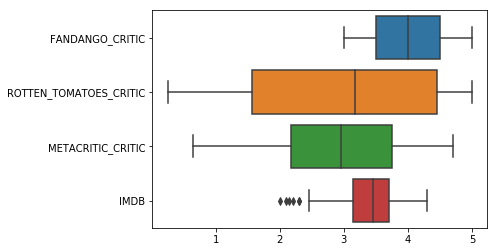

In [103]:
sns.boxplot(data=df_Rating,orient='h')
plt.show()

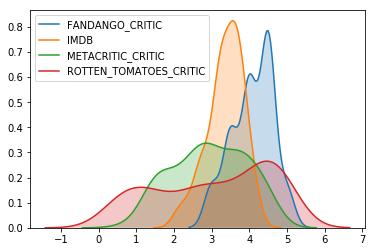

In [83]:
sns.kdeplot(df_Rating['FANDANGO_CRITIC'],shade=True)
sns.kdeplot(df_Rating['IMDB'],shade=True)
sns.kdeplot(df_Rating['METACRITIC_CRITIC'],shade=True)
sns.kdeplot(df_Rating['ROTTEN_TOMATOES_CRITIC'],shade=True)
plt.show()

From above descriptive statistic and boxplot we can see that Fandango rating is usually high compared to other critics ratings.
Fandango has given 75% of movies above 3.5 rating which looks biased as no movie is rated low.
for other three the ratings as spread wide from low to high but for Rotten Tomatoes center is flatened which tells us that either the movies are rated high or below average.

# User Count

In [104]:
df_Votes.describe()

,RT_user_vote_count,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes
count,146.000000,146.000000,146.000000,146.000000
mean,36674.657534,185.705479,42846.205479,3848.787671
std,70607.124607,316.606515,67406.509171,6357.778617
min,289.000000,4.000000,243.000000,35.000000
25%,4861.750000,33.250000,5627.000000,222.250000
50%,14629.500000,72.500000,19103.000000,1446.000000
75%,26516.000000,168.500000,45185.750000,4439.500000
max,432099.000000,2375.000000,334164.000000,34846.000000


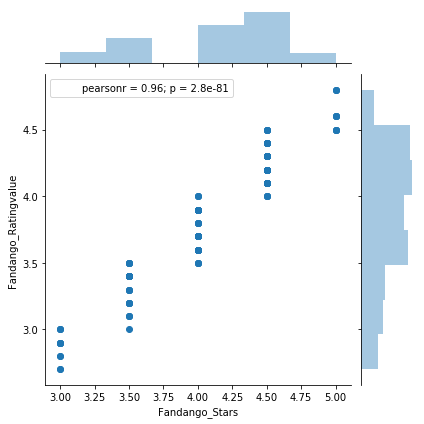

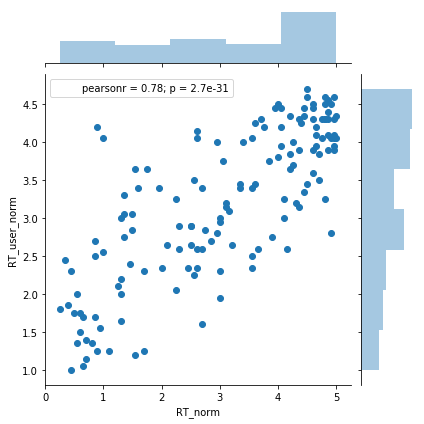

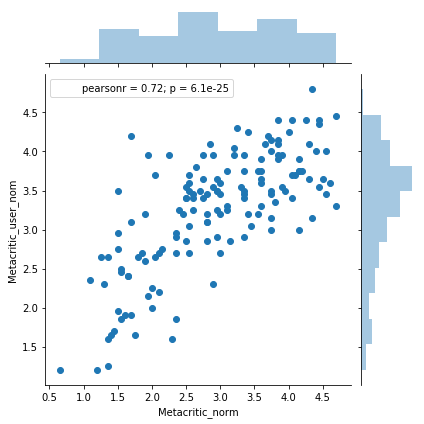

In [99]:
sns.jointplot(data=df,x='Fandango_Stars',y='Fandango_Ratingvalue')
sns.jointplot(data=df,x='RT_norm',y='RT_user_norm')
sns.jointplot(data=df,x='Metacritic_norm',y='Metacritic_user_nom')
plt.show()

we can reject Fandango and Rotten Tomatoes for biased rating as we analysed above. Comparing between Metacritc and IMDB User base it is evident that IMDB has lot high user base compared to Metacritic but it also has high standard deviation and it can be assumed that only few movies are rated by more number of users and most are only reviewed by few users and usualy people review either very bad or very good movies. Thus, strong user base could not be took as a prime factor in deciding better critic site. 

# Correlation Matrix

As Fandango is highly biased among all so we take it as a negitive reference and compare the correlation of other rating site with Fandango.

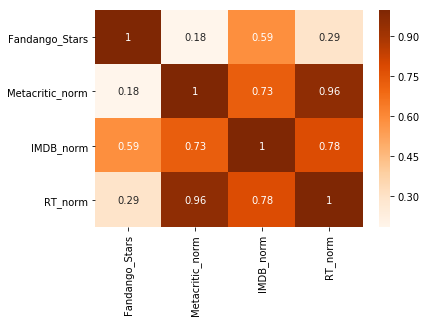

In [102]:
sns.heatmap(df[['Fandango_Stars','Metacritic_norm','IMDB_norm','RT_norm']].corr(),cmap='Oranges',annot=True)
plt.show()

From above matrix we can see that Metacritic is least correlted with Fandango.

# Conclusion

From above analysis we can conclude that Metacritic is more reliable compared to other as
1.	The Metacritic ratings are spread across below average to above average with more rating falling under the average category.
2.	Metacritic is least correlated with Fandango which is least preferred and looks biased in rating.
